Tutorial 1: Pixelizations

To begin chapter 4, we’ll begin by learning about Pixelization’s, which we apply to a source-plane to reconstruct a source-galaxy’s light.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

Lets setup a lensed source-plane grid, using a lens galaxy and Tracer (our source galaxy doesn’t have a LightProfile,as we’re going to reconstruct its light using a pixelization).

In [2]:
grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=2)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.PointMass2(
        centre=(0.0, 0.0), einstein_radius=1.6
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, al.Galaxy(redshift=1.0)])

source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=grid)[1]

Next, lets set up a _Pixelization_using the ‘pixelization’ module, which is imported as ‘pix’ for short.

There are multiple Pixelization’s available in PyAutoLens. For now, we’ll keep it simple and use a uniform rectangular grid. As usual, the grid’s ‘shape’ defines its (y,x) dimensions.

In [3]:
rectangular = al.pix.Rectangular(shape=(25, 25))

By itself, a _Pixelization_doesn’t tell us much. It has no Grid of coordinates, no image, and nothing which tells it about the lens we’re fitting. This information comes when we use the _Pixelization_to set up a Mapper. We’ll use the (traced) source-plane Grid to set up this mapper.

In [4]:
mapper = rectangular.mapper_from_grid_and_sparse_grid(grid=source_plane_grid)

This Mapper is a ‘RectangularMapper’ - every Pixelization generates it owns mapper.

By plotting our mapper, we now see our Pixelization. Its a fairly boring Grid of rectangular pixels.

(we’ll cover what the ‘inversion’ means in a later tutorial).

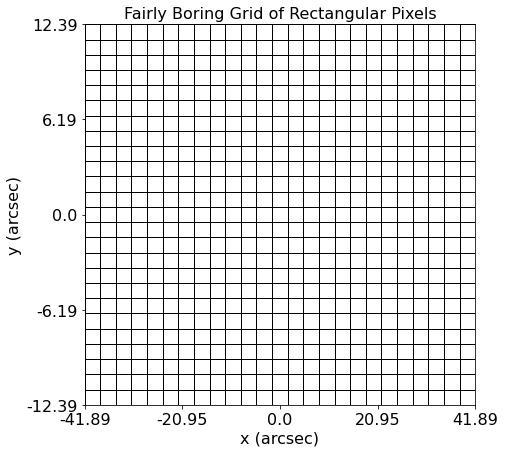

In [5]:
aplt.MapperObj(
    mapper=mapper,
    include=aplt.Include(inversion_grid=False, inversion_pixelization_grid=False),
    plotter=aplt.Plotter(
        labels=aplt.Labels(title="Fairly Boring Grid of Rectangular Pixels")
    ),
)

However, the Mapper does contain lots of interesting information about our Pixelization, for example its pixelization_grid tells us where the pixel centers are located.

In [7]:
print("Rectangular Grid Pixel Centre 1:")
print(mapper.pixelization_grid[0])
print("Rectangular Grid Pixel Centre 2:")
print(mapper.pixelization_grid[1])
print("Rectangular Grid Pixel Centre 3:")
print(mapper.pixelization_grid[2])
print("etc.")

Rectangular Grid Pixel Centre 1:
[ 11.89224001 -40.21487521]
Rectangular Grid Pixel Centre 2:
[ 11.89224001 -36.86363561]
Rectangular Grid Pixel Centre 3:
[ 11.89224001 -33.51239601]
etc.


Infact, we can plot these centre on our Grid - to make it look slightly less boring!

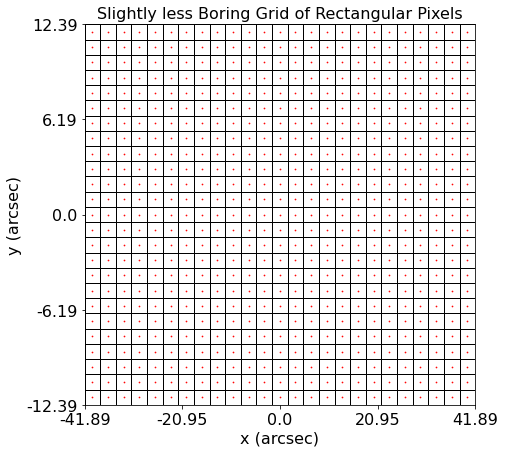

In [9]:
aplt.MapperObj(
    mapper=mapper,
    include=aplt.Include(inversion_grid=False, inversion_pixelization_grid=True),
    plotter=aplt.Plotter(
        labels=aplt.Labels(title="Slightly less Boring Grid of Rectangular Pixels")
    ),
)

The Mapper also has the (source-plane) Grid that we passed when we set it up. Lets check they’re the same.

In [10]:
print("Source Grid Pixel 1")
print(source_plane_grid[0])
print(mapper.grid[0])
print("Source Grid Pixel 2")
print(source_plane_grid[1])
print(mapper.grid[1])
print("etc.")

Source Grid Pixel 1
[ 12.38775  -41.890495]
[ 12.38775  -41.890495]
Source Grid Pixel 2
[ 12.28825  -41.077455]
[ 12.28825  -41.077455]
etc.


We can over-lay the Grid on top. Its starting to look a bit less boring now!

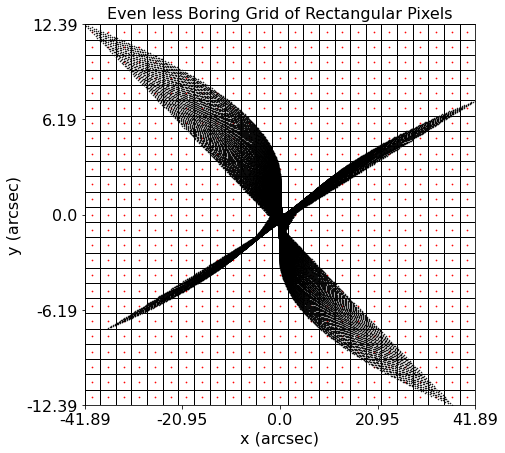

In [25]:
aplt.MapperObj(
    mapper=mapper,
    include=aplt.Include(inversion_grid=True, inversion_pixelization_grid=True),
    plotter=aplt.Plotter(
        labels=aplt.Labels(title="Even less Boring Grid of Rectangular Pixels")
    ),
)

Finally, the mapper’s pixeliation_grid has lots of information about the Pixelization, for example, the arc-second size and dimensions.

In [13]:
print(mapper.pixelization_grid.shape_2d_scaled)
print(mapper.pixelization_grid.scaled_maxima)
print(mapper.pixelization_grid.scaled_minima)

(24.775500020000003, 83.78099002000002)
(Grid(12.38775001), Grid(41.89049501))
(Grid(-12.38775001), Grid(-41.89049501))


And with that, we’re done. This was a relatively gentle overview of Pixelization’s, but one that was hopefully easy to follow